In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')


In [10]:
df=pd.read_csv("D:\DATASETs\Data Science\Dataset in Csv\Lifestyle_Health_Prediction_Dataset.csv")
df
df.shape
df.info()
df.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


,age,weight,height,sleep,bmi
count,5000.00,5000.00,5000.00,5000.00,5000.00
mean,48.81,77.36,171.93,7.00,26.84
std,17.91,18.71,15.82,1.43,8.25
min,18.00,45.00,145.00,3.00,11.40
25%,34.00,61.00,158.00,6.00,20.30
50%,49.00,77.00,171.50,7.00,26.00
75%,64.00,94.00,186.00,8.00,32.40
max,79.00,109.00,199.00,10.00,51.40


In [16]:
df.columns=[c.strip().lower().replace(' ','_').replace('/','_')for c in df.columns]
catcol=['smoking','exercise','sugar_intake','alcohol','married','profession','health_risk']
for c in catcol:
    if c in df.columns:
        df[c]=df[c].astype('category')
df.info()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           5000 non-null   int64   
 1   weight        5000 non-null   int64   
 2   height        5000 non-null   int64   
 3   exercise      5000 non-null   category
 4   sleep         5000 non-null   float64 
 5   sugar_intake  5000 non-null   category
 6   smoking       5000 non-null   category
 7   alcohol       5000 non-null   category
 8   married       5000 non-null   category
 9   profession    5000 non-null   category
 10  bmi           5000 non-null   float64 
 11  health_risk   5000 non-null   category
dtypes: category(7), float64(2), int64(3)
memory usage: 230.8 KB


np.int64(0)

Univariate Analysis

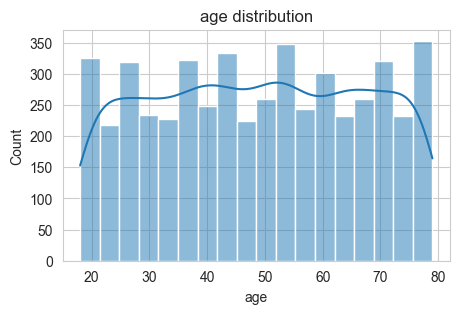

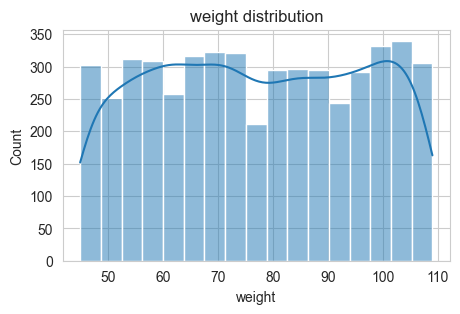

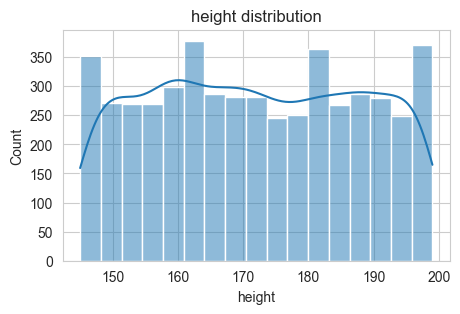

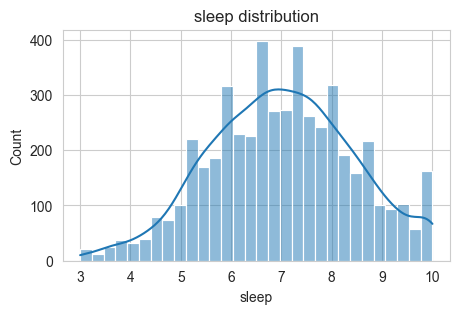

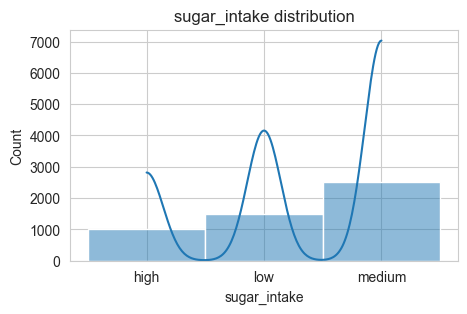

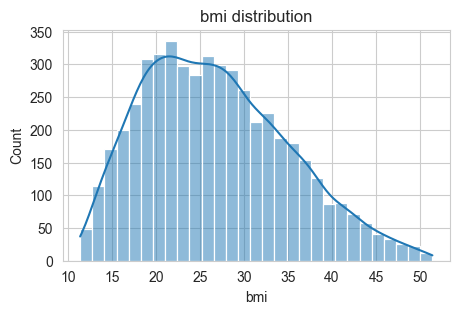

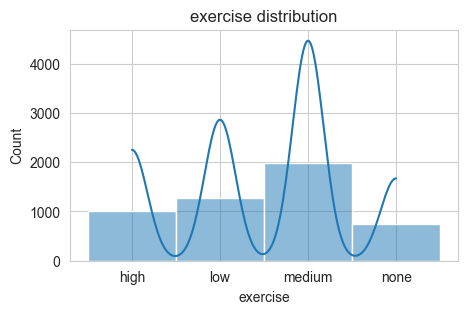

In [21]:
numcols=['age','weight','height','sleep','sugar_intake','bmi','exercise']
for col in numcols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col],kde=True)
    plt.title(f'{col} distribution')
    plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           5000 non-null   int64   
 1   weight        5000 non-null   int64   
 2   height        5000 non-null   int64   
 3   exercise      5000 non-null   category
 4   sleep         5000 non-null   float64 
 5   sugar_intake  5000 non-null   category
 6   smoking       5000 non-null   category
 7   alcohol       5000 non-null   category
 8   married       5000 non-null   category
 9   profession    5000 non-null   category
 10  bmi           5000 non-null   float64 
 11  health_risk   5000 non-null   category
dtypes: category(7), float64(2), int64(3)
memory usage: 230.8 KB


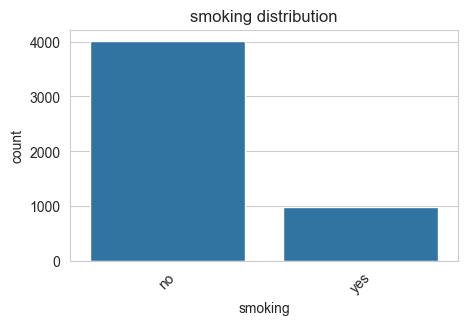

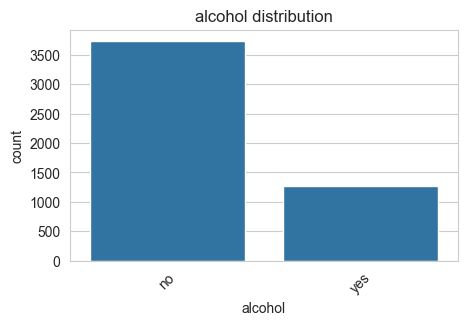

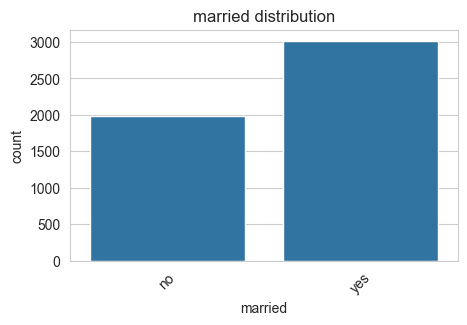

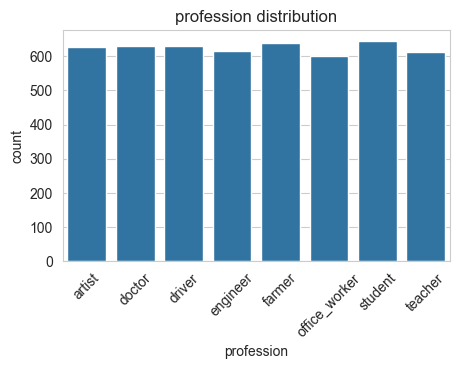

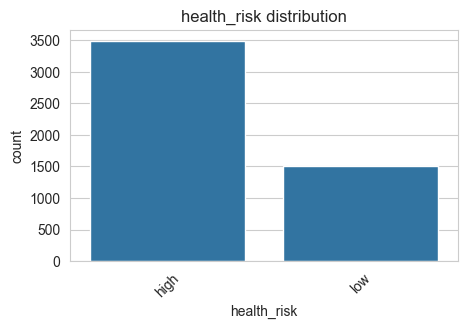

In [25]:
catcols=['smoking','alcohol','married','profession','health_risk']
for col in catcols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col,data=df)
    plt.title(f'{col} distribution')
    plt.xticks(rotation=45)
    plt.show()
    

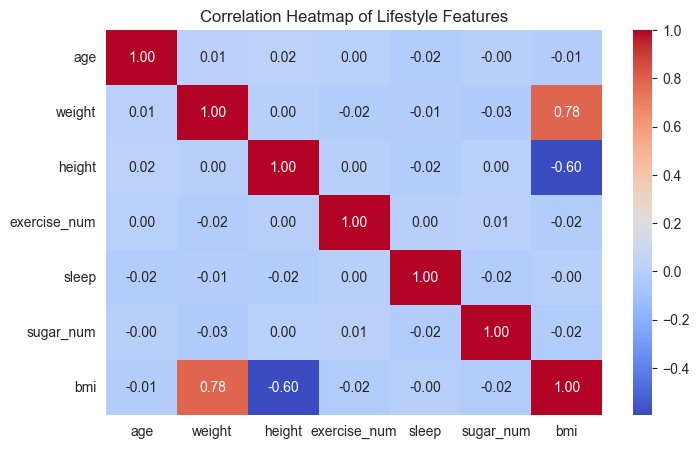

In [30]:
exercise_map = {'none': 0, 'low': 1, 'medium': 2, 'high': 3}
sugar_map = {'low': 0, 'medium': 1, 'high': 2}

df['exercise_num'] = df['exercise'].map(exercise_map)
df['sugar_num'] = df['sugar_intake'].map(sugar_map)
df[['exercise','exercise_num','sugar_intake','sugar_num']].head()

plt.figure(figsize=(8,5))
sns.heatmap(df[['age','weight','height','exercise_num','sleep','sugar_num','bmi']].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap of Lifestyle Features')
plt.show()

Feature Engineering

In [43]:
df['bmi_category']=pd.cut(df['bmi'],bins=[0,18.5,24.9,29.9,100],labels=['Underweight','Normal','Overweight','Obese'])
df['sleep']=pd.to_numeric(df['sleep'],errors='coerce')
df['exercise_num']=pd.to_numeric(df['exercise_num'],errors='coerce')
df['exercise_sleep_ratio']=(df['exercise_num']/df['sleep']).round(2)
df[['exercise_num','sleep','exercise_sleep_ratio']].head()
df['sugar_risk_num']=pd.to_numeric(df['sugar_num'],errors='coerce')
df['sugar_risk_score']=(df['sugar_risk_num']*0.4+df['bmi']*0.6).round(2)
df['lifestyle_score']=(df['exercise_num']+df['sleep']-df['sugar_risk_num']).round(2)
df[['exercise_num','sugar_risk_num','sleep','exercise_sleep_ratio','sugar_risk_score','lifestyle_score']].head()

,exercise_num,sugar_risk_num,sleep,exercise_sleep_ratio,sugar_risk_score,lifestyle_score
0,1,1,6.1,0.16,10.96,6.1
1,3,2,6.9,0.43,16.58,7.9
2,3,0,6.6,0.45,27.18,9.6
3,2,1,8.5,0.24,9.76,9.5
4,3,0,8.0,0.38,15.48,11.0


In [46]:
features=['age','weight','height','sleep','bmi','exercise_num','sugar_risk_num','exercise_sleep_ratio','sugar_risk_score','lifestyle_score']
X=df[features].copy()
X.head()

,age,weight,height,sleep,bmi,exercise_num,sugar_risk_num,exercise_sleep_ratio,sugar_risk_score,lifestyle_score
0,56,67,195,6.1,17.6,1,1,0.16,10.96,6.1
1,69,76,170,6.9,26.3,3,2,0.43,16.58,7.9
2,46,106,153,6.6,45.3,3,0,0.45,27.18,9.6
3,32,54,186,8.5,15.6,2,1,0.24,9.76,9.5
4,60,98,195,8.0,25.8,3,0,0.38,15.48,11.0
